In [43]:
from itertools import product
from statsmodels.tsa.arima_model import ARIMA
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.stats import ttest_1samp, shapiro, probplot
from scipy.stats import boxcox
import statsmodels.api as sm

<span style="font-size: 14pt">MIPT, Advanced ML, Autumn 2017</span>

<span style="font-size: 16pt"> HW #2: ARMA, ARIMA

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:
- Магнус Я.Р., Катышев П.К., Пересецкий А.А. Эконометрика. Начальный курс., глава 11
- Лукишн Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall <номер_группы> <фамилия>``, к примеру -- ``ML2017_Aut_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall Question <Содержание вопроса>``

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было 

<h1 align="center">Check Questions (20%)</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1** Напишите уравнение временного ряда (в виде $y_t=f\left(y_{t-1}, \dots, y_1,~\varepsilon_{t},\dots, \varepsilon_{1}\right)$) которая соответствует модели:
   * 1) ARIMA $(p=0,d=k,q=1)$,
     - $(1-B)^kY_{t}=\theta_1e_{t-1} \to \hat{Y_t} = \sum\limits_{i=0}^{k-1}{C_k^iY_{t-k+i}} + \theta_1e_{t-1}$
   * 2) ARIMA $(p=0,d=k+1,q=1)(P=1, D=1, Q=0)_s$,
     - $2\hat{Y_t} = \sum\limits_{i=0}^{k}{C_k^iY_{t-k+i}} + \theta_1e_{t-1} + w_1Y_{t-s} + Y_{t-s}$

**Вопрос 2**  Write canonic form of ARIMA model for the time series
 - 1) $$y_t = a_1 y_{t-1} + a_2 y_{t-4} - a_1 a_2 y_{t-5} + \varepsilon_t$$ (Hint: seasnality period is equal to 4).
 - 2) $$y_t = y_{t-d} + \varepsilon_t +b_2 + \varepsilon_{t-2} + B_1 \varepsilon_{t-s} + b_2 B_1 \varepsilon_{t-s-2} $$

**Вопрос 3** Покажите, что ARIMA$(p=0,d=2, q=2)$ эквивалентна модели Хольта (linear trend) при условиях:
		$$(1-В)^2Y_t = (1-\phi_1 В-\phi_2 В^2)\varepsilon_t$$
		$$\phi_1 = 2-\alpha-\alpha\beta, \text{ }\phi_2 = \alpha-1$$

**Вопрос 4**: Покажите, что для модели  
    $$AR(p)\colon \;\;\; y_t = \phi_1 y_{t-1} + \phi_2 y_{t-2} + \dots + \phi_p y_{t-p} + \varepsilon_t,$$**  
    где $y_t$ стационарный процесс с нулевым средним,$~~$
    $\phi_1,\dots,\phi_p$ - константы ($\phi_p \neq 0$), $~~$
    $\varepsilon_t$ несмещённый гауссовский шум с дисперсией $\sigma_\varepsilon^2 $
выолнено:

   * a) частный коэффициент автокорреляции
   $$\phi_{\tau\tau} = \mathsf{E}[y_t-\hat y_t, y_{t+\tau} - \hat y_{t+\tau}]= \begin{cases}0 &, \tau>p; \\ f(\tau,p)>0 &, 0\leq\tau\leq p. \end{cases}$$
	
  где $\hat y_t$ - прогноз $y_t$ согласно следующей регрессионной модели $$y_t = \sum_{j=1}^{\tau-1}\beta_j y_{t+j}$$
    $\hat y_{t+\tau}$ - forecast of $y_{t\tau}$ with following regression model $$y_{t+\tau} = \sum_{j=1}^{\tau-1}\gamma_j y_{t+j}.$$

<Ответ>

**Вопрос 5**: Покажите, что для модели 
$$MA(q)\colon \;\;\; y_t = \varepsilon_t + \theta_1\varepsilon_{t-1} + \theta_2\varepsilon_{t-2} + \dots + \theta_q \varepsilon_{t-q},$$ 
   где $y_t$ стационарный процесс с нулевым средним,$~~$
     $\theta_1,\dots,\theta_q$ - константы ($\theta_q \neq 0$), $~~$
    $\varepsilon_t$ несмещённый гауссовский шум с дисперсией $\sigma_\varepsilon^2 $
выолнено:

* a) коэффициент корреляции
   $$r_\tau=\begin{cases}0 &, \tau>q; \\ f(\tau,q)>0 &, \tau\leq q. \end{cases}$$
   
<Answer>

**Вопрос 6** . Conclude in accordance with results above how to choose $p$ and $q$ parameters for ARMA model by looking at ACF and PACF.

<Ответ>

PS: Если проверяющий не понял ответ на большинство вопросов, то будет пичалька. Пишите так, чтобы можно было разобраться. 

<h1 align="center"> Practice</h1>

<h2 align="center">  1. Download data for following data sets (10%)</h2>
* 1) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep36.csv</span> (105 TS of goods sales in the shop #36 of one real Retail Net, each TS correspond to an item in this shop )
* 2) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep42.csv</span> (105 TS of goods sales in shop #42 of one real Retail Net, each TS correspond to an item in this shop)
* 3) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep6.csv </span>(110 TS of goods sales in shop #6 of one real Retail Net, each TS correspond to an item in this shop)

All data you can find by <a href='https://1drv.ms/f/s!AqGgzb5T4tvShb8iJuzFHOeXR11wOg'>link</a> 

* For each data set: 
      - 1) learn it's structure in csv-file and read it into Pandas data frame (be careful with parsing data)
      - 2) plot each time series
      - 3) answer the questions: is there seasonlaity, trend, changes in level in TS? If there is seasonality then define period of seasonality. 

In [44]:
ts6  = pd.read_csv('TS_dep6.csv',  sep=';', index_col='Timestamp', parse_dates=True, decimal=',')
ts36 = pd.read_csv('TS_dep36.csv', sep=';', index_col='Timestamp', parse_dates=True, decimal=',')
ts42 = pd.read_csv('TS_dep42.csv', sep=';', index_col='Timestamp', parse_dates=True, decimal=',')

In [45]:
ts6.head()

,item 1089,item 10960,item 1178,item 11827,item 1511,item 15934,item 16368,item 17248,item 18232,item 18291,...,item 89787,item 91285,item 91845,item 93627,item 93634,item 96260,item 96880,item 97952,item 99146,item 99147
Timestamp,,,,,,,,,,,,,,,,,,,,,
2006-11-01,1.0,2.0,0.0,3.0,3.0,0.0,0.0,2.0,3.0,4.0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-02,2.0,2.0,4.0,0.0,0.0,1.0,0.0,5.0,1.0,6.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-03,4.0,4.0,1.0,3.0,3.0,1.0,0.0,5.0,6.0,7.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-04,0.0,3.0,2.0,1.0,1.0,0.0,2.0,1.0,1.0,7.0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-05,4.0,8.0,1.0,2.0,1.0,1.0,2.0,6.0,5.0,6.0,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


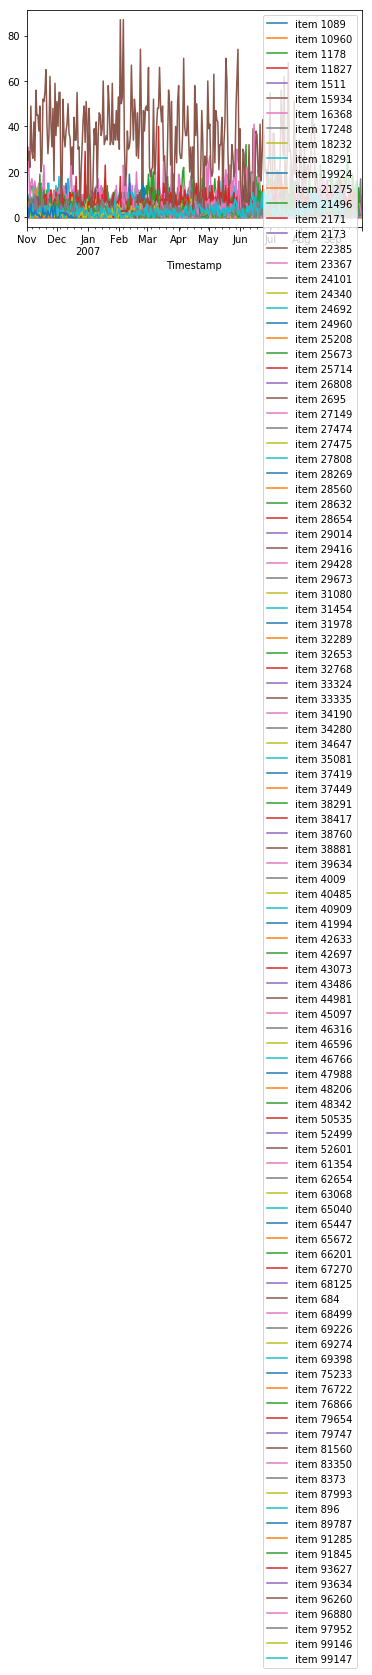

In [46]:
ts6 = ts6.astype(float)
ts6.plot()

In [47]:
ts36.head()

,item 1758,item 40010,item 35731,item 96474,item 97519,item 75501,item 95519,item 93400,item 99826,item 57813,...,item 65825,item 31454,item 29014,item 49139,item 42190,item 8110,item 80718,item 29092,item 76501,item 32258
Timestamp,,,,,,,,,,,,,,,,,,,,,
2005-12-05,0.000,0.000,2.484,0.000,0.0,1.334,1,1,2.0,0,...,7,12,0.0,66.324,32.864,12,23,63,14,177
2005-05-13,0.878,0.983,2.632,1.120,1.0,3.514,4,0,1.0,0,...,16,17,0.0,69.952,34.024,24,30,97,13,63
2005-05-14,0.332,1.346,2.016,0.302,1.0,2.590,0,2,0.0,1,...,11,12,0.0,35.366,31.626,20,0,80,12,94
2005-05-15,0.000,0.556,0.882,0.000,4.0,1.708,1,1,1.0,2,...,9,15,0.0,37.898,43.726,20,0,64,6,105
2005-05-16,0.438,0.671,0.314,1.486,2.0,2.790,3,0,2.0,1,...,11,11,0.0,49.566,34.548,23,0,43,4,51


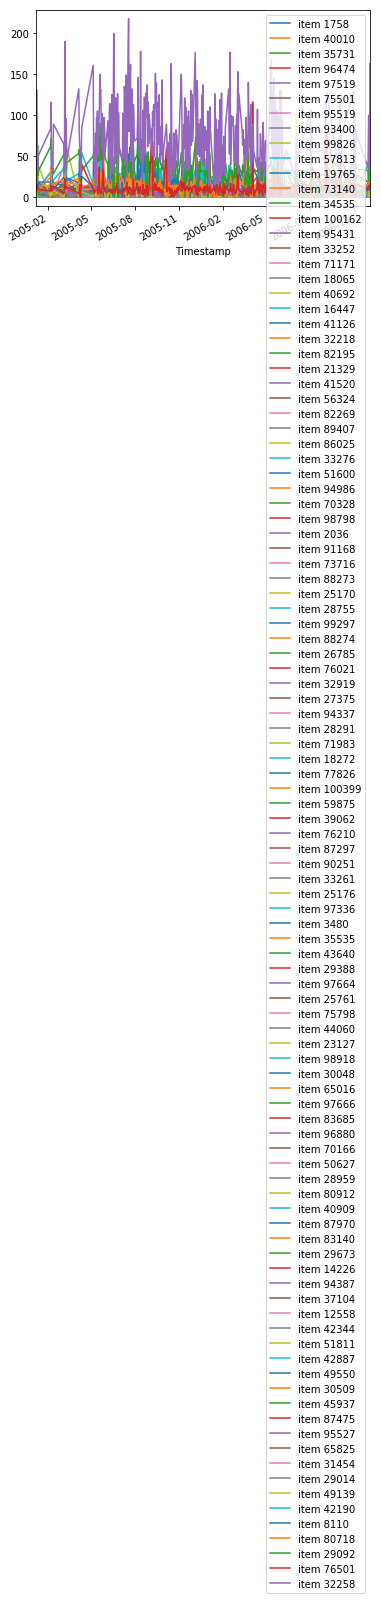

In [48]:
ts36.plot()

In [49]:
ts42.head()

,item 558,item 834,item 883,item 1311,item 1396,item 1647,item 1689,item 1761,item 1969,item 2036,...,item 77539,item 79279,item 80510,item 82356,item 87639,item 88121,item 89103,item 89977,item 95417,item 96668
Timestamp,,,,,,,,,,,,,,,,,,,,,
2005-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-06-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-07-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


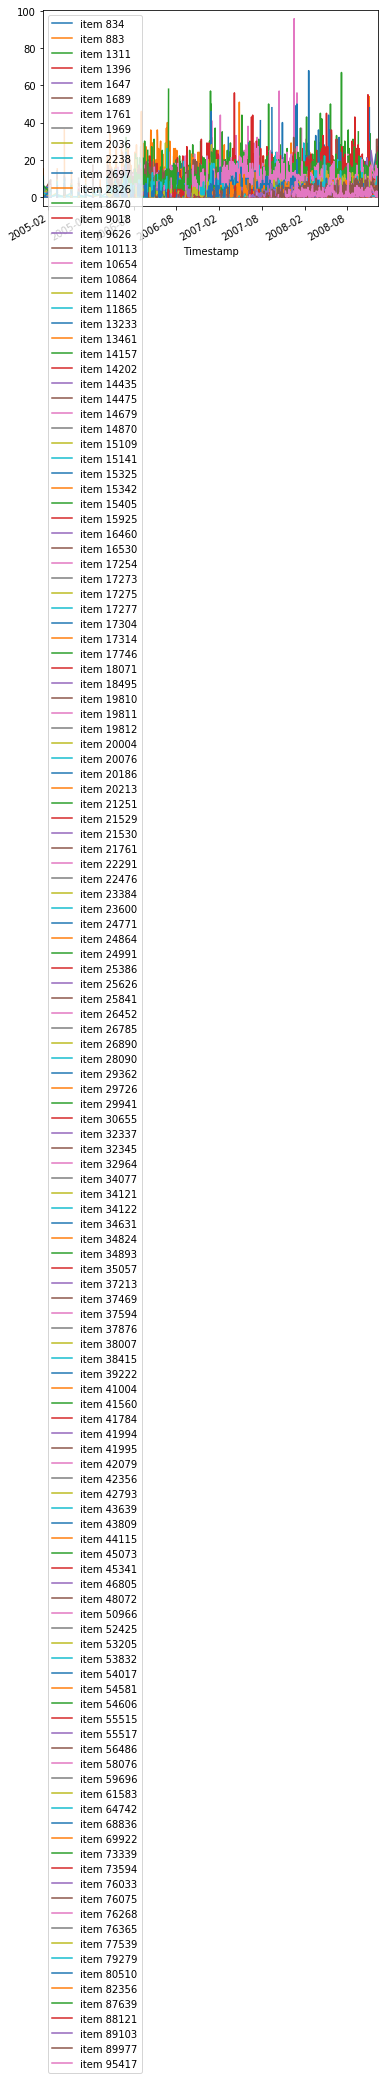

In [50]:
ts42.plot()

<h2 align="center">2. ARIMA Model real TS (70%) </h2>
You need to analyse a TS and build forecast with ARIMA model for it. 
Each student has its own TS: you can find id of yout TS that you need to forecast <a href="https://drive.google.com/open?id=1y5xgpgErIiJFYmXWB-eFYmQ6OUMocqP-VGpTIXLuzCw">here</a>. 

**I. Build ARIMA forecast yourself ** 

Also you can follow the next scheme:

 * 0) read data for TS under consideration and use the first 80% of all length of the TS as train TS.  
 * 1) plot the graph of the train TS, preprocess data (delete tail, make calendar transformation if needed)
 * 2) stabilize dispersion of the train TS through box-cox transformation if needed.
 * 3) if the transformed train TS is non-stationary make it stationary (remember the power of differencing $d$).
 * 4) plot ACF/PACF for  the transformed train TS in order to understand whether $AR(p)/MA(q)$ may be used.
 * 5) select set of candidate parameters for ARMA (for the train TS)
 * 6) train candidate ARIMA models (use $d$ from step 3), $p$, $q$ from step 5)), compare their AIC, choose the best model.
 * 7) check test for unbiasedness, stationarity and non-autocorrelation of the residuals of the best ARIMA model; if the tests fail you need to review your choice.
 * 8) build forecast for the initial TS (you need to transform it like in step 2)
 * 9) build forecast interval for the last 20% of the transformed initial TS. Calculate loss MACAPE of your forecast. Does the forecast look appropriate?

0.0

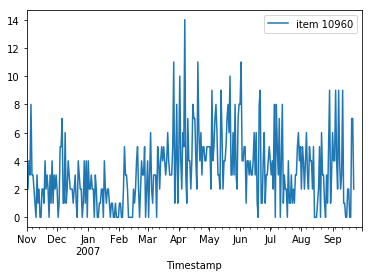

In [51]:
my_ts = ts6['item 10960'].to_frame()
my_ts.plot()
my_ts.dropna().values.min()

Нужно стабилизировать дисперсию

Чтобы бокс-кокс сработал, поднимем ряд

In [52]:
my_ts = my_ts.dropna() + 1.

In [53]:
my_ts['box-cox'], bc_lmbda = boxcox(my_ts)
bc_lmbda = bc_lmbda[0]
bc_lmbda

0.32490530640365484

(-4.2216694313532566,
 0.00060540568035725561,
 4,
 321,
 {'1%': -3.4508869586361608,
  '10%': -2.5715897843576827,
  '5%': -2.870586350823483},
 788.14973037051732)

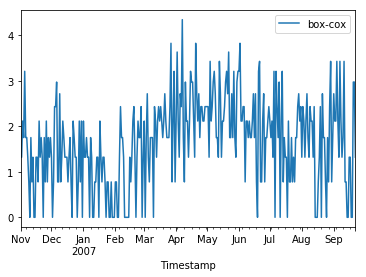

In [54]:
my_ts['box-cox'].to_frame().plot()
sm.tsa.adfuller(my_ts['box-cox'])

Теперь дисперсия намного стабильнее и ряд можно считать стационарным.

In [55]:
thr = int(0.8 * len(my_ts))
train, test = my_ts['box-cox'].head(thr), my_ts['box-cox'].tail(len(ts6) - thr)

In [56]:
print(len(train), len(test))

260 74


In [57]:
train.head()

Timestamp
2006-11-01    1.320253
2006-11-02    1.320253
2006-11-03    2.114271
2006-11-04    1.751163
2006-11-05    3.206838
Name: box-cox, dtype: float64

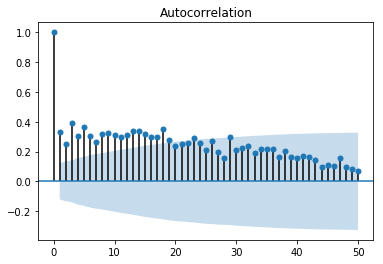

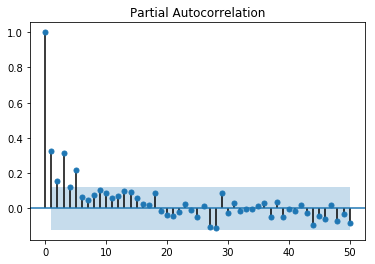

In [58]:
sm.graphics.tsa.plot_acf(train, lags=50)
sm.graphics.tsa.plot_pacf(train, lags=50)
plt.show()

Ряд сильно скореллирован, и это не объясняется только частичной автокорелляцией. Стоит его продифференцировать.

(-7.6333605937594404,
 1.9817753331816634e-11,
 12,
 246,
 {'1%': -3.4572152372657472,
  '10%': -2.5730700760129555,
  '5%': -2.8733618415663238},
 605.77846439107918)

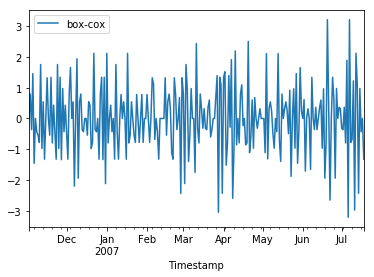

In [59]:
diff = ((train - train.shift()).dropna()).to_frame()
diff.plot()
sm.tsa.stattools.adfuller(diff.values.ravel())

Снова посмотрим на acf и pacf:

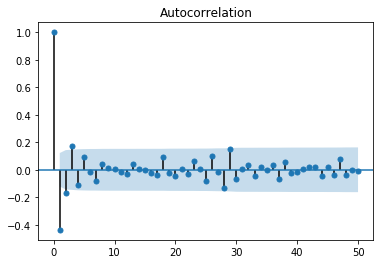

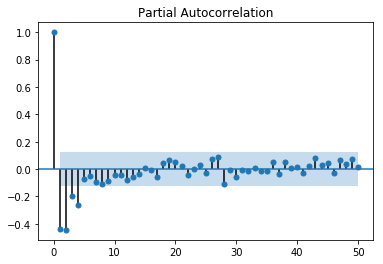

In [60]:
sm.graphics.tsa.plot_acf(diff, lags=50)
sm.graphics.tsa.plot_pacf(diff, lags=50)
plt.show()

Теперь зависимость выглядит проще. Учитывая последние статзначимые значения, стоит рассмотреть $p\sim4, q\sim3$.

Найдем лучшие значения параметров в окрестности указанных:

In [61]:
def arima_tune(p, d, q):  # pdq ranges
    best_params = (0, 0, 0)
    best_score = np.inf

    for param in product(p, d, q):
        try:
            model = ARIMA(train, param).fit(disp=-1)
            if(model.aic < best_score):
                best_params = param
                best_score = model.aic
        except:
            continue

    return (best_params, best_score)

In [62]:
best_params, _ = arima_tune(range(3,6), [1], range(2,5))

/home/pasha/anaconda3/envs/nlp/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/pasha/anaconda3/envs/nlp/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/pasha/anaconda3/envs/nlp/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/pasha/anaconda3/envs/nlp/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/pasha/anaconda3/envs/nlp/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum L

In [63]:
best_params

(3, 1, 4)

Итого, лучшая модель - $ARIMA(3,1,4)$. Проверим ее остатки.

In [64]:
best_model = ARIMA(train, (best_params)).fit()

/home/pasha/anaconda3/envs/nlp/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


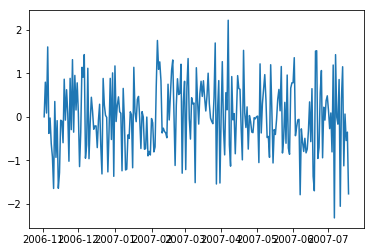

In [65]:
residuals = best_model.resid
plt.plot(best_model.resid)

In [66]:
sm.tsa.adfuller(residuals)

(-16.783112566900119,
 1.2595126026013552e-29,
 0,
 258,
 {'1%': -3.4559529277063419,
  '10%': -2.5727749906856561,
  '5%': -2.8728086526320302},
 579.268307517209)

In [67]:
ttest_1samp(residuals, 0.)

Ttest_1sampResult(statistic=-0.054375679375903638, pvalue=0.95667793693085601)

In [68]:
shapiro(residuals)

(0.9960184097290039, 0.7537115812301636)

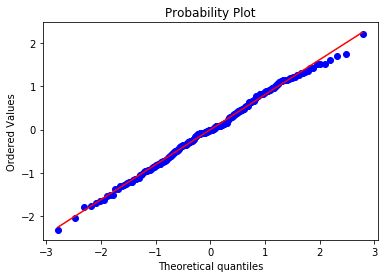

In [69]:
probplot(residuals, plot=plt)
plt.show()

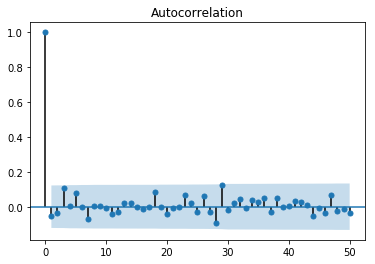

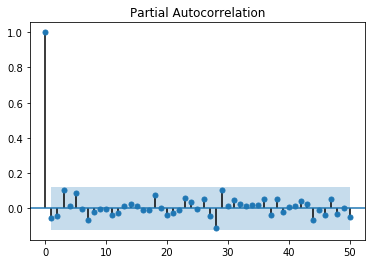

In [70]:
sm.graphics.tsa.plot_acf(residuals, lags=50)
sm.graphics.tsa.plot_pacf(residuals, lags=50)
plt.show()

Итого, остатки нормальны, стационарны, неавтокореллированы и с нулевым средним, т.е. $\sim$белый шум, значит, мы учли большинство внутренних зависимостей. Что мы и хотели.

Посмотрим на прогноз нашей модели:

In [71]:
print(test.index[0], test.index[-1])

2007-07-11 00:00:00 2007-09-22 00:00:00


In [100]:
def inv_bc(x, lmbda):
    if lmbda == 0:
        return(np.exp(x))
    else:
        return(np.exp(np.log(lmbda * x + 1) / lmbda))

$ARIMA$ вернет нам _продифференцированный_ ряд, его нужно "проинтегрировать".

In [73]:
real_diffs = train - train.shift()

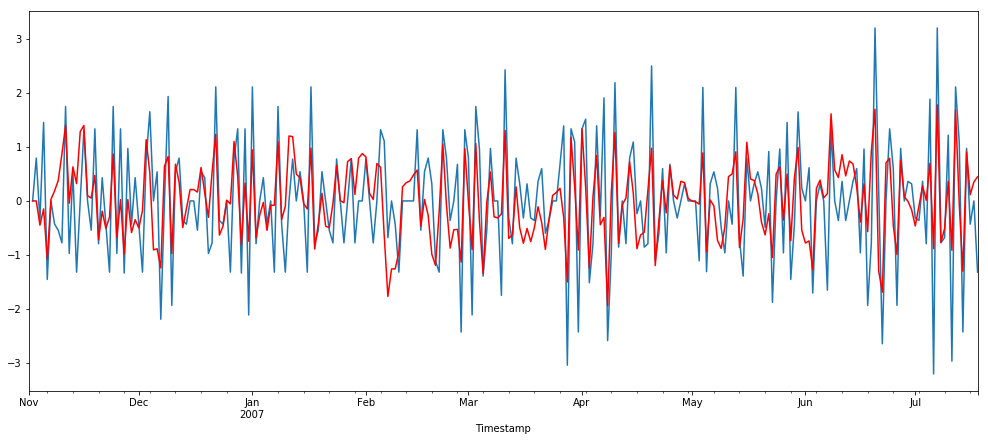

In [74]:
real_diffs.plot(figsize=(17,7))
best_model.fittedvalues.plot(figsize=(17,7), color='r')
plt.show()

На дифф. ряд зафитились неплохо, смотрим на основной.

In [75]:
arr = train[0] * np.ones_like(train)
arr[1:] += best_model.fittedvalues.cumsum()
#arr = inv_bc(arr, bc_lmbda)
fitted = pd.Series(arr, index=train.index)

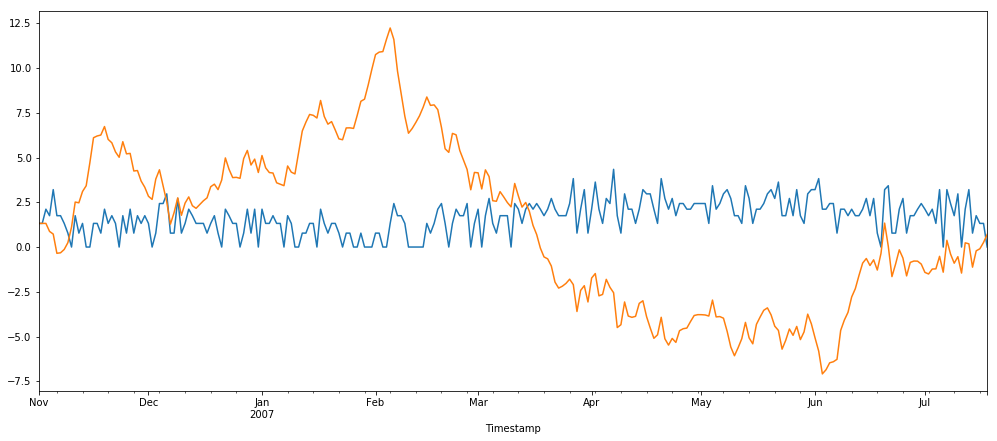

In [76]:
train.plot(figsize=(17,7))
fitted.plot(figsize=(17,7))
plt.show()

При "интегрировании" ошибки предсказания сказываются еще сильнее, поэтому идея приближать дифференцированный ряд была не самой удачной, ведь после всего нужно еще делать обратное преобразование бокса-кокса, а это $\sim exp$ - будет очень плохо, smape можно и не считать.

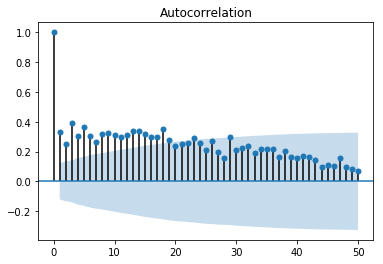

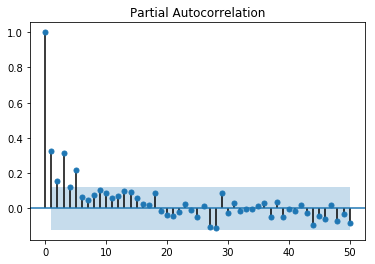

In [77]:
sm.graphics.tsa.plot_acf(train, lags=50)
sm.graphics.tsa.plot_pacf(train, lags=50)
plt.show()

Судя по графикам, $q$ стоит выбрать $\sim5$, а $p$ надо бы порядка $19$, но это очень ресурсоемко. Скорее всего, большая часть автокорелляции обусловлена промежуточными зависимостями. Поэтому рассмотрим, для начала, квадратик $5x5$. Значения небольшие, обучится быстро.

In [78]:
best_param, _ = arima_tune(range(1,6), [0], range(1,6))

/home/pasha/anaconda3/envs/nlp/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/pasha/anaconda3/envs/nlp/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/pasha/anaconda3/envs/nlp/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/home/pasha/anaconda3/envs/nlp/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:585: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/home/pasha/anaconda3/envs/nlp/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:585: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/home/pasha/anaconda3/envs/nlp/lib/py

In [79]:
best_param
best_model = ARIMA(train, best_param).fit()

Что ж, посмотрим на треин

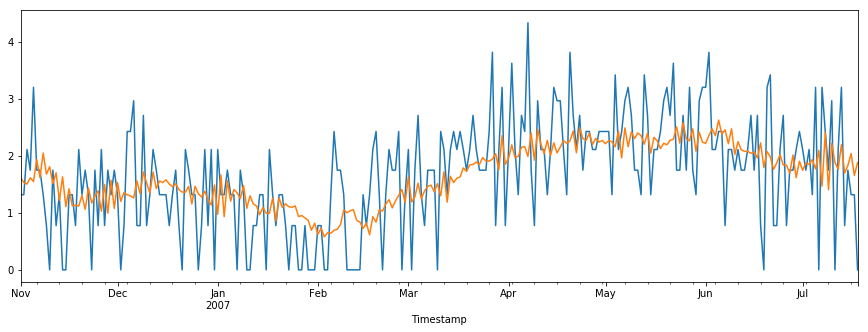

In [80]:
train.plot(figsize=(15,5))
best_model.fittedvalues.plot(figsize=(15,5))

Вышло тоже плохо. Опять же smape на прогнозе считать особого смысла нет, мы даже на треин зафититься нормально не смогли. Тперь проведем полный перебор на случай, если пропущен какой-то крутой вариант.

**II. Find the best parameters of ARIMA automaticaly** 
* 0) read data for TS under consideration and use the first 80% of all length of the TS as train TS.  
* 1) plot the graph of the train TS, preprocess data (delete tail, make calendar transformation if needed)
* 2) stabilize dispersion of train TS through box-cox transformation if needed.
* 3) Run grid search for ARIMA parameters (use transformed train TS) according to AIC. Use at least 10 distinct values for $p,q,d$. How many time does it take?
* 4) Build forecast for the initial TS with best ARIMA model selected automaticaly at step 2 (you need to transform it like in step 2).
* 5) Build forecast interval for the last 20% of transformed TS. Calculate loss MACAPE of your forecast. Does the forecast look appropriate?

# NEXT CELL TAKES LONG TIME !

In [87]:
huge_grid_best_params, _ = arima_tune(range(11), [0], range(11))

/home/pasha/anaconda3/envs/nlp/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/pasha/anaconda3/envs/nlp/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/pasha/anaconda3/envs/nlp/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/home/pasha/anaconda3/envs/nlp/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:585: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/home/pasha/anaconda3/envs/nlp/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:585: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/home/pasha/anaconda3/envs/nlp/lib/py

/home/pasha/anaconda3/envs/nlp/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/pasha/anaconda3/envs/nlp/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/pasha/anaconda3/envs/nlp/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:654: RuntimeWarning: invalid value encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))


In [89]:
huge_grid_best_model = ARIMA(train, huge_grid_best_params).fit()

/home/pasha/anaconda3/envs/nlp/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [106]:
fitted = pd.Series(huge_grid_best_model.fittedvalues)

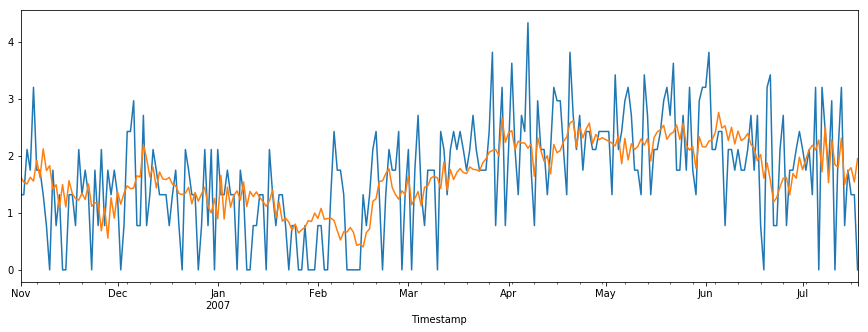

In [107]:
train.plot(figsize=(15,5))
fitted.plot(figsize=(15,5))
plt.show()

И опять так себе - во многих местах не улавливает паттерны и все так же не рассчитывает скачки. Хотя, по всей видимости, это лучшее из того, что можно было получить за разумное время с использованием аримы. На этот раз посмотрим-таки на smape на трансформированных рядах (как указано).

In [132]:
def macape(x,y):
    return np.mean(2 * np.abs(x - y) / (x + y))

In [133]:
prediction = pd.Series(huge_grid_best_model.forecast(steps=len(test))[0], index=test.index)

In [135]:
print(macape(prediction.values, test.values))

0.629581533826


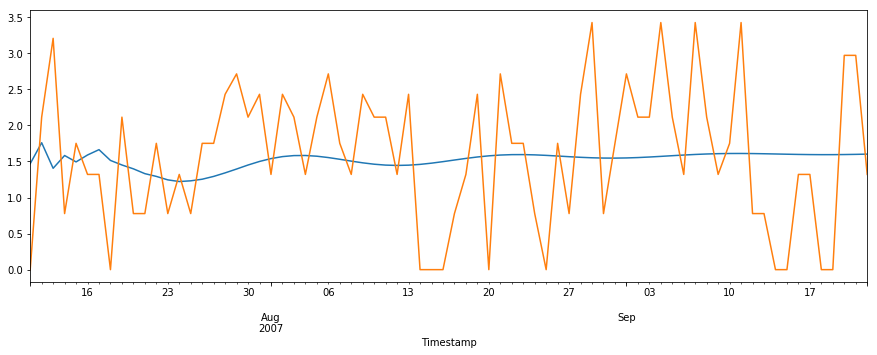

In [118]:
prediction.plot(figsize=(15,5))
test.plot(figsize=(15,5))

Из графика видно, что снова получилось некруто.